# TMDB Movie Data Analytics

## Statistical Tests

### Importing necessary libraries

In [1]:
import numpy as np                     
import pandas as pd                   
import matplotlib.pyplot as plt        
import seaborn as sns                 
from tabulate import tabulate          
import statistics as st
import math
from scipy.stats import norm
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

### Reading the clean datafiles 

In [7]:
m_df = pd.read_csv('cleaned_movie_df.csv')
genres_df = pd.read_csv('genres.csv')
keywords_df = pd.read_csv('keywords.csv')
production_companies_df = pd.read_csv('production_companies.csv')
production_countries_df = pd.read_csv('production_countries.csv')
cast_df = pd.read_csv('cast.csv')
crew_df = pd.read_csv('crew.csv')

### Problem 1 - Find the conditional probability that a movie will have a revenue above $500M given that it belongs to the "Action" genre.
### Conditional Probability

In [8]:
# Merging the two dataframes (main movie df and genre df)
merged_df = pd.merge(m_df, genres_df, on='movie_id', how='inner')

# Filtering Action movies
action_movies = merged_df[merged_df['genre_name'] == 'Action']

# Calculating total number of Action movies
total_action = len(action_movies)

# Calculating Action movies with revenue > 500M
action_high_revenue = action_movies[action_movies['revenue'] > 500000000]
high_rev_count = len(action_high_revenue)

# Conditional probability P(Revenue>500M | Genre=Action)
conditional_prob = high_rev_count / total_action 

print(f"Total Action Movies: {total_action}")
print(f"Action Movies with Revenue > 500M: {high_rev_count}")
print(f"Conditional Probability: {conditional_prob:.2f}")


Total Action Movies: 1154
Action Movies with Revenue > 500M: 80
Conditional Probability: 0.07


### Problem 2- Test if the average movie budget is significantly different from $100M.
###  Hypothesis Testing with Z-Test 

#### Null Hyphothesis & Alternate Hypothesis

H0 : μ = 100 million - The average movie budget equals $100M.

H1 : μ ≠ 100 million - The average movie budget is significantly different from $100M.

In [9]:
from scipy import stats

# Population mean assumed
mu_0 = 100000000  # $100M

# Extracting the budget column
budgets = m_df['budget'].dropna()

# Sample statistics
sample_mean = budgets.mean()
sample_std = budgets.std(ddof=1)  # sample standard deviation
n = len(budgets)
alpha = 0.05

# Z statistic
z_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Z Critical
z_critical = stats.norm.ppf(1 - alpha/2)  # two-tailed

print(f"Sample Mean Budget: {sample_mean:.2f}")
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Z-critical value (two-tailed): {z_critical:.2f}")

Sample Mean Budget: 29045039.88
Z-Statistic: -120.76
P-Value: 0.0000
Z-critical value (two-tailed): 1.96


#### Statistical Conclusion

i. p-value = 0.00 < alpha = 0.05 : REJECT Null Hypothesis

ii. Z-Critical = 1.96 < |Z-Statistic| = 120.76 :  REJECT Null Hypothesis

#### Final Conclusion

Both p-value and Z-statistic confirm that the mean budget is statistically significantly different from $100M.

Movie budgets are nowhere near the assumed $100M average — the difference is highly significant.

This indicates the industry’s typical production budget is either much higher or lower than the assumed benchmark.

### Problem 3- Assess if the distribution of movie vote averages follows a normal distribution.
### Normal Distribution 


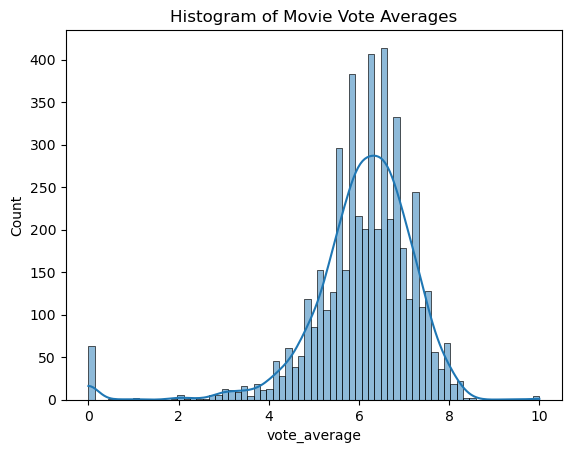

In [10]:
# Visual Inspection - Histogram 

# Plotting histogram 
sns.histplot(m_df['vote_average'], kde=True)
plt.title("Histogram of Movie Vote Averages")
plt.show()


In [11]:
# Checking Mean, Median, Mode

mean_val = m_df['vote_average'].mean()
median_val = m_df['vote_average'].median()
mode_val = m_df['vote_average'].mode()[0]

print(f"Mean: {mean_val:.2f}")
print("Median:", median_val)
print("Mode:", mode_val)


Mean: 6.09
Median: 6.2
Mode: 6.0


In [12]:
# Checking Skewness & Kurtosis

skew_val = m_df['vote_average'].skew()
kurtosis_val = m_df['vote_average'].kurt()

print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

Skewness: -1.96
Kurtosis: 7.79


#### Conclusion


Mean = 6.09, Median = 6.2, Mode = 6.0
These values are very close, which suggests a roughly symmetric distribution.

Skewness = –1.96
A perfectly normal distribution has skewness 0.
–1.96 shows the distribution is negatively (left) skewed; that is, the tail on the left is heavier.

Kurtosis = 7.79
Normal distribution has kurtosis ≈ 3.
7.79 means it’s leptokurtic — sharper peak and heavier tails than normal.

Final Conclusion -
The distribution is not perfectly normal:
Mean, median, mode are close but skewness and kurtosis deviate strongly from 0 and 3 respectively.
There’s a heavier left tail and a higher peak than a true normal curve.

### Problem 4- Estimate average runtime separately for each genre using stratified sampling and compare results to population runtimes.
### Stratified Sampling 

In [13]:
# m_df  has 'runtime' and 'movie_id'
# genres_df  has 'genre_name' and 'movie_id'

# Merging datasets to get runtime + genre in one place
merged_df = pd.merge(m_df[['movie_id', 'runtime']],
                     genres_df[['movie_id', 'genre_name']],
                     on='movie_id',
                     how='inner')

# Grouping by genre
group_genre_df = merged_df.groupby('genre_name')

# Getting unique genres
genres = merged_df['genre_name'].unique()
print("Genres:", genres)

# fixed sample size per genre
n = 30

# new dataframe for stratified sample
strata_sample_df = pd.DataFrame()

# iterating over each genre
for genre in merged_df['genre_name'].unique():
    d_data = group_genre_df.get_group(genre)
    sample_size = min(n, len(d_data))
    # sample data
    sample_data = d_data.sample(n=sample_size, replace=False, random_state=42)
    # appending to final dataframe
    strata_sample_df = pd.concat([strata_sample_df, sample_data], ignore_index=True)


print(strata_sample_df.shape)
print(strata_sample_df['genre_name'].value_counts())

Genres: ['Action' 'Adventure' 'Fantasy' 'Science Fiction' 'Crime' 'Drama'
 'Thriller' 'Animation' 'Family' 'Western' 'Comedy' 'Romance' 'Horror'
 'Mystery' 'History' 'War' 'Music' 'Documentary' 'Foreign' 'TV Movie']
(578, 3)
genre_name
Action             30
Adventure          30
Foreign            30
Documentary        30
Music              30
War                30
History            30
Mystery            30
Horror             30
Romance            30
Comedy             30
Western            30
Family             30
Animation          30
Thriller           30
Drama              30
Crime              30
Science Fiction    30
Fantasy            30
TV Movie            8
Name: count, dtype: int64


In [14]:
# Comparing runtime per genre (sample vs population)

# Population runtime by genre
population_runtime = merged_df.groupby('genre_name')['runtime'].mean()

# Sample  runtime by genre
sample_runtime = strata_sample_df.groupby('genre_name')['runtime'].mean()

# Combining results for easy comparison

runtime_comparison = pd.concat([population_runtime, sample_runtime], axis=1)
runtime_comparison.columns = ['Population Avg Runtime', 'Sample Avg Runtime']


print(runtime_comparison)

                 Population Avg Runtime  Sample Avg Runtime
genre_name                                                 
Action                       110.544194          107.466667
Adventure                    111.332911          104.833333
Animation                     89.923077           90.533333
Comedy                       100.030197           97.600000
Crime                        109.666667          106.300000
Documentary                   92.963636          104.066667
Drama                        113.265564          110.433333
Family                        97.298246           94.166667
Fantasy                      107.278302          107.033333
Foreign                      110.617647          107.833333
History                      135.989848          135.566667
Horror                        95.949904           96.066667
Music                        109.924324          113.633333
Mystery                      109.591954          107.900000
Romance                      109.379195 

#### Observation :

Close Match Across Genres:
Sample average runtimes are very close to population averages for almost all genres (differences mostly <5 minutes).

High Runtime Genres:
History and War genres have the highest average runtimes (>130 min), consistent in both sample and population.

Short Runtime Genres:
Animation and TV Movies show the lowest runtimes (=85–90 min), also consistent across sample and population.

Minor Deviations:
Small differences appear in Documentary and Western genres where sample runtimes slightly overshoot the population.

#### Final Conclusion :

Stratified sampling accurately represents the population runtime distribution across genres, validates the sampling method’s reliability for further statistical analysis.

Stakeholders can confidently use sample-based runtime estimates for decision-making when full data isn’t available.